In [7]:
# Initialize Otter
import otter
grader = otter.Notebook("lab8.ipynb")

# Lab 8: Fitting Models to Data

In this lab, you will practice using a numerical optimization package `cvxpy` to compute solutions to optimization problems. The example we will use is a linear fit and a quadratic fit.

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Objectives for Lab 8:

Models and fitting models to data is a common task in data science. In this lab, you will practice fitting models to data. The models you will fit are:

* Linear fit
* Normal distribution

## Boston Housing Dataset

In [9]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
housing = pd.DataFrame(boston_dataset['data'], columns=boston_dataset['feature_names'])
housing['MEDV'] = boston_dataset['target']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


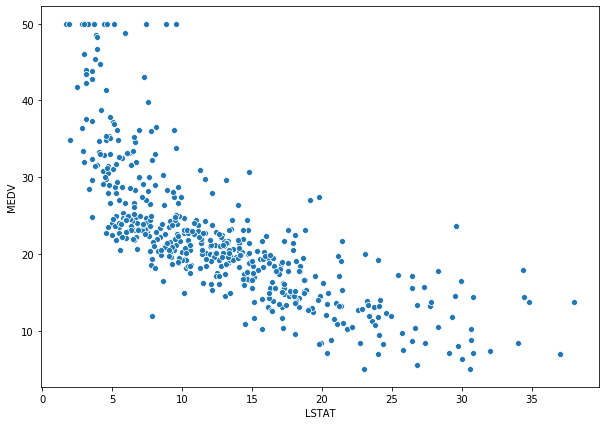

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x='LSTAT', y='MEDV', data=housing)
plt.show()

The model for the relationship between the response variable MEDV ($y$) and predictor variables LSTAT ($u$) and RM ($v$) is that
$$ y_i = \beta_0 + \beta_1 u_i + \epsilon_i, $$
where $\epsilon_i$ is random noise.

In order to fit the linear model to data, we minimize the sum of squared errors of all observations, $i=1,2,\dots,n$. 
$$\begin{aligned}
&\min_{\beta} \sum_{i=1}^n (y_i - \beta_0 + \beta_1 u_i )^2 = \min_{\beta} \sum_{i=1}^n (y_i - x_i^T \beta)^2 = \min_{\beta} \|y - X \beta\|_2^2
\end{aligned}$$
where $\beta = (\beta_0,\beta_1)^T$, and $x_i^T = (1, u_i)$. Therefore, $y = (y_1, y_2, \dots, y_n)^T$ and $i$-th row of $X$ is $x_i^T$. 

## Question 1: Constructing Data Variables

Define $y$ and $X$ from `housing` data.

<!--
BEGIN QUESTION
name: q1
manual: false
points: 3
-->

In [23]:
y = housing['MEDV']
X1 = pd.DataFrame(housing['LSTAT'])
X1.insert(0, 'intercept', np.ones(X1.shape[0]))

In [24]:
grader.check("q1")

q1 passed!

## Installing CVXPY

First, install `cvxpy` package by running the following bash command:

In [25]:
# !pip install cvxpy

## Question 2: Fitting Linear Model to Data

Read this example of how cvxpy problem is setup and solved: https://www.cvxpy.org/examples/basic/least_squares.html

The usage of cvxpy parallels our conceptual understanding of components in an optimization problem:
* `beta` are the variables $\beta$
* `loss` is sum of squared errors
* `prob` minimizes the loss by choosing $\beta$

Make sure to extract the data array of data frames (or series) by using `values`: e.g., `X.values` 

<!--
BEGIN QUESTION
name: q2
manual: false
points: 3
-->

In [36]:
import cvxpy as cp

beta2 = cp.Variable(2)
loss2 = cp.sum_squares(np.array(X1) @ beta2 - y)
prob2 = cp.Problem(cp.Minimize(loss2))
prob2.solve()

yhat2 = beta2.value

In [37]:
grader.check("q2")

q2 passed!

<!-- BEGIN QUESTION -->

## Question 3: Visualizing resulting Linear Fit

Visualize fitted model by plotting `LSTAT` by `MEDV`.

<!--
BEGIN QUESTION
name: q3
manual: true
points: 3
-->

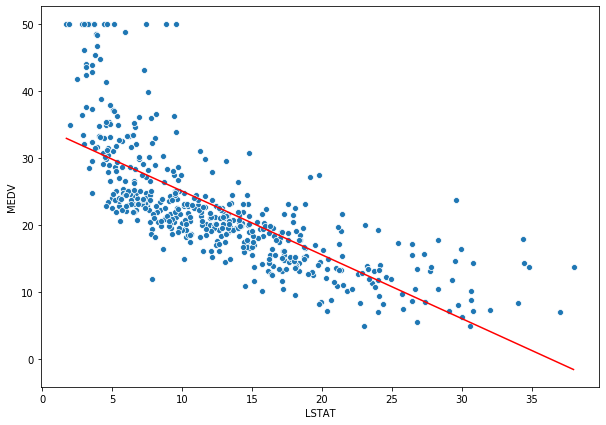

In [40]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.scatterplot(x='LSTAT', y='MEDV', data=housing)
sns.lineplot ( x = housing['LSTAT'] ,y = np.array(X1) @ yhat2, color = 'red')
plt.show()

<!-- END QUESTION -->

## Question 4: Fitting Quadratic Model to Data

Add a column of squared `LSTAT` values to `X`. The new model is,

Then, fit a quadratic model to data.

<!--
BEGIN QUESTION
name: q4a
manual: false
points: 3
-->

In [41]:
X2 = X1.copy()
X2.insert(2, 'LSTAT^2', X2['LSTAT']**2)

beta4 = cp.Variable(3)
loss4 = cp.sum_squares(np.array(X2) @ beta4 - y)
prob4 = cp.Problem(cp.Minimize(loss4))

prob4.solve()

yhat4 = beta4.value

In [42]:
grader.check("q4a")

q4a passed!

<!-- BEGIN QUESTION -->

Visualize quadratic fit:

<!--
BEGIN QUESTION
name: q4b
manual: true
points: 3
-->

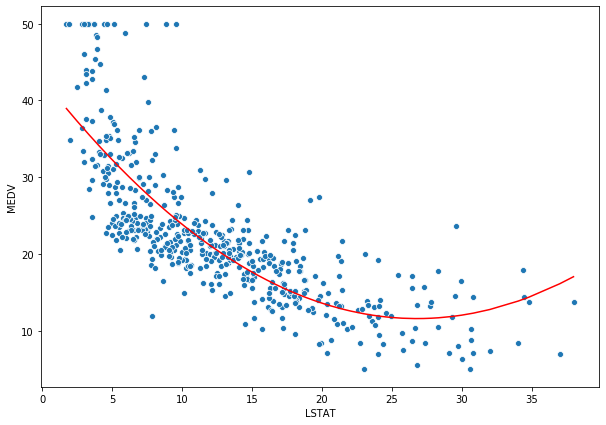

In [43]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.scatterplot(x='LSTAT', y='MEDV', data=housing)
sns.lineplot ( x = housing['LSTAT'] ,y = np.array(X2) @ yhat4, color = 'red')

plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [44]:
grader.check_all()

q1 passed!

q2 passed!

q4a passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()